In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
cols = df.columns

cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Cleaning

In [6]:
for i in cols:
    print(f'{i} : {df[i].isna().sum()}')

Age : 0
Attrition : 0
BusinessTravel : 0
DailyRate : 0
Department : 0
DistanceFromHome : 0
Education : 0
EducationField : 0
EmployeeCount : 0
EmployeeNumber : 0
EnvironmentSatisfaction : 0
Gender : 0
HourlyRate : 0
JobInvolvement : 0
JobLevel : 0
JobRole : 0
JobSatisfaction : 0
MaritalStatus : 0
MonthlyIncome : 0
MonthlyRate : 0
NumCompaniesWorked : 0
Over18 : 0
OverTime : 0
PercentSalaryHike : 0
PerformanceRating : 0
RelationshipSatisfaction : 0
StandardHours : 0
StockOptionLevel : 0
TotalWorkingYears : 0
TrainingTimesLastYear : 0
WorkLifeBalance : 0
YearsAtCompany : 0
YearsInCurrentRole : 0
YearsSinceLastPromotion : 0
YearsWithCurrManager : 0


Getting Rid of columns with no unique value

In [7]:
eli = []

for i in cols:
    if len(df[i].unique()) == 1:
        eli.append(i)
        df.drop(columns = i, inplace = True)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [8]:
eli

['EmployeeCount', 'Over18', 'StandardHours']

There are multiple features denoting the income which might cause collinearity. Thus getting rid of 'DailyRate', 'HourlyRate', 'MonthlyRate'.

In [9]:
df.drop(columns = ['DailyRate', 'HourlyRate', 'MonthlyRate'], inplace = True)

In [10]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0


## EDA

In [11]:
df1 = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\HR-Employee-Attrition.csv")

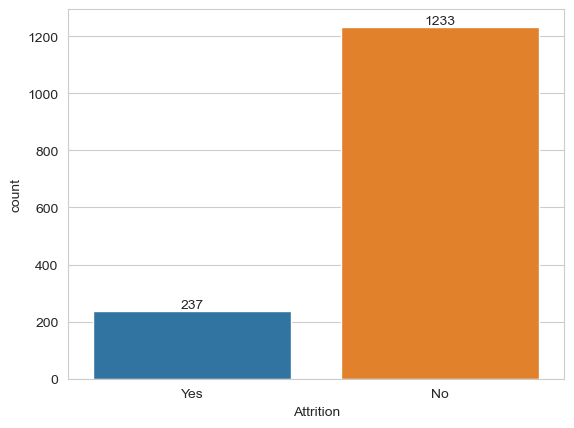

In [12]:
ax = sns.countplot(data=df1, x="Attrition")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

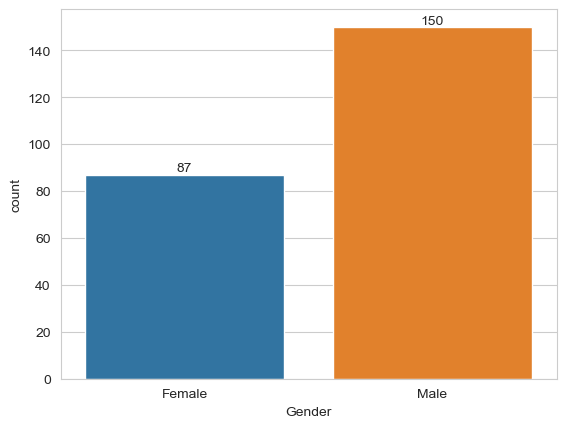

In [13]:
test = df1[ df1['Attrition'] == 'Yes' ]
ax = sns.countplot(data=test, x = 'Gender')

for label in ax.containers:
    ax.bar_label(label)
plt.show()

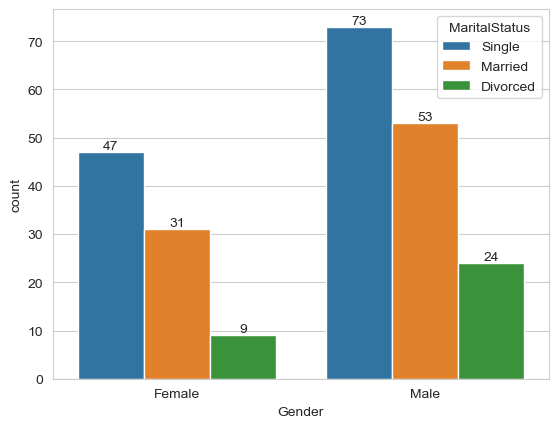

In [14]:
test = df1[ df1['Attrition'] == 'Yes' ]
ax = sns.countplot(data=test, x = 'Gender', hue = 'MaritalStatus')

for label in ax.containers:
    ax.bar_label(label)
plt.show()

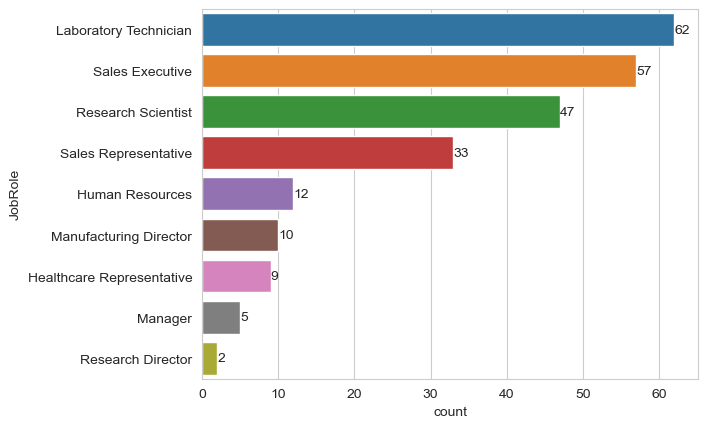

In [15]:
test = df1[ df1['Attrition'] == 'Yes' ]
ax = sns.countplot(data=test, y = 'JobRole', order = test['JobRole'].value_counts().index)

for label in ax.containers:
    ax.bar_label(label)
plt.show()

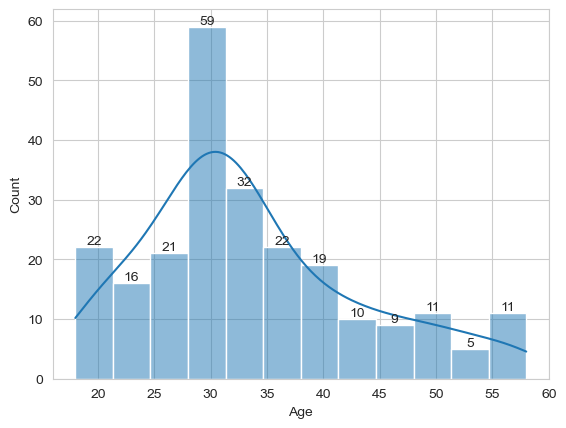

In [16]:
test = df1[ df1['Attrition'] == 'Yes' ]
ax = sns.histplot(data = test, x = 'Age', kde=True)

for label in ax.containers:
    ax.bar_label(label)
plt.show()

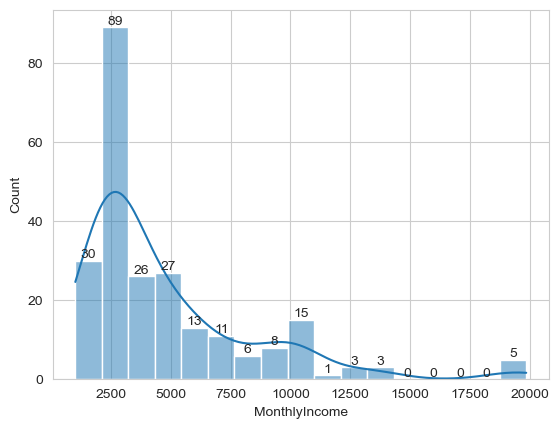

In [17]:
# MonthlyIncome

test = df1[ df1['Attrition'] == 'Yes' ]
ax = sns.histplot(data = test, x = 'MonthlyIncome', kde=True)

for label in ax.containers:
    ax.bar_label(label)
plt.show()

## Preprocessing

In [18]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [19]:
df['OverTime'].replace(['Yes', 'No'], [1,0], inplace = True)
df['Gender'].replace(['Female', 'Male'], [1,0], inplace = True)
df['Attrition'].replace(['Yes', 'No'], [1,0], inplace = True)

In [20]:
df['Gender'].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [21]:
col_o = []

for i in df.columns:
    if df[i].dtype == 'O':
        col_o.append(i)

col_o

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [22]:
df.shape

(1470, 29)

In [23]:
for i in col_o:
    print(f'{i} : {df[i].unique()} : {df[i].nunique()}')

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] : 3
Department : ['Sales' 'Research & Development' 'Human Resources'] : 3
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] : 6
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] : 9
MaritalStatus : ['Single' 'Married' 'Divorced'] : 3


In [24]:
df_enc = pd.get_dummies(data = df, columns = col_o, drop_first = True)

df_enc.head(4)

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,1,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,0,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,4,0,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,1,3,1,3,...,0,0,0,0,0,1,0,0,1,0


In [25]:
df_enc.drop(columns = 'EmployeeNumber', inplace = True)

df_enc.shape

(1470, 42)

In [26]:
df_enc.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Ex

## Oversampling and Scaling

In [27]:
X = df_enc.drop(columns = 'Attrition')
y = df_enc['Attrition'].copy()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [29]:
y_train.value_counts()

0    853
1    176
Name: Attrition, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [31]:
y_resampled.value_counts()

0    853
1    511
Name: Attrition, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

scaler = StandardScaler()
qscaler = QuantileTransformer()

In [33]:
X_resampled_q = qscaler.fit_transform(X_resampled)
X_test_q = qscaler.fit_transform(X_test)

## Model Testing

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
models = [('LR', LogisticRegression(max_iter = 5000)), ('KNN', KNeighborsClassifier()),
          ('TREE', DecisionTreeClassifier()), ('SVM', SVC())]

scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

l = []

for name, model in models:
    j = []
    j.append(name)
    results = cross_validate(model, X_resampled_q, y_resampled, scoring=scoring)
    for i in scoring:
        j.append(results['test_'+ i].mean())
    l.append(j)
    
cv_results = pd.DataFrame(l, columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'ROC_AUC'])

cv_results.sort_values(by = 'Accuracy', ascending = False, inplace = True)

cv_results

,Model,Accuracy,Recall,Precision,ROC_AUC
2,TREE,0.873179,0.952941,0.766428,0.889123
3,SVM,0.865131,0.773063,0.853779,0.930896
0,LR,0.812317,0.706530,0.776743,0.864093
1,KNN,0.784454,0.720122,0.709774,0.870951


## KNN Performance

In [36]:
KNN = KNeighborsClassifier()

KNN.fit(X_resampled_q, y_resampled)

KNeighborsClassifier()

In [37]:
y_pred = KNN.predict(X_test_q)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.90      0.79      0.84       380
         Yes       0.26      0.46      0.34        61

    accuracy                           0.75       441
   macro avg       0.58      0.63      0.59       441
weighted avg       0.81      0.75      0.77       441



In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## SVC Performance

In [41]:
svc = SVC()

svc.fit(X_resampled_q, y_resampled)

SVC()

In [42]:
y_pred = svc.predict(X_test_q)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.93      0.90      0.91       380
         Yes       0.47      0.56      0.51        61

    accuracy                           0.85       441
   macro avg       0.70      0.73      0.71       441
weighted avg       0.86      0.85      0.86       441



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Decision Tree Performance

In [43]:
tree = DecisionTreeClassifier()

tree.fit(X_resampled_q, y_resampled)

DecisionTreeClassifier()

In [44]:
y_pred = tree.predict(X_test_q)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.90      0.83      0.86       380
         Yes       0.28      0.41      0.33        61

    accuracy                           0.77       441
   macro avg       0.59      0.62      0.60       441
weighted avg       0.81      0.77      0.79       441



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Logistic Regression Performance

In [45]:
logreg = LogisticRegression()

logreg.fit(X_resampled_q, y_resampled)

LogisticRegression()

In [46]:
y_pred = tree.predict(X_test_q)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.90      0.83      0.86       380
         Yes       0.28      0.41      0.33        61

    accuracy                           0.77       441
   macro avg       0.59      0.62      0.60       441
weighted avg       0.81      0.77      0.79       441



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = [{'class_weight' : [{0 : 1, 1 : v} for v in (1.25,1.5,1.75,2)]}]

LRGrid = GridSearchCV(estimator = logreg,
                      param_grid = params,
                      cv = 10,
                      return_train_score = True)

In [ ]:
param = {'C': [1, 5, 10], 'kernel': ('linear', 'rbf')}

SVCGrid = GridSearchCV(estimator = svc,
                       param_grid = param,
                       cv = 10,
                       return_train_score = True)

In [ ]:
param = {'criterion' : ('gini', 'entropy'), 'max_depth' : [2,4,6,8,10,12] }

TGrid = GridSearchCV(estimator = tree,
                     param_grid = param,
                     cv = 10,
                     return_train_score = True)

In [ ]:
LRGrid.fit(X_resampled, y_resampled)

In [ ]:
SVCGrid.fit(X_resampled, y_resampled)

In [ ]:
TGrid.fit(X_resampled, y_resampled)

In [ ]:
LRGrid.best_params_

In [ ]:
SVCGrid.best_params_

In [ ]:
TGrid.best_params_

In [ ]:
# {'class_weight': {0: 1, 1: 1.25}}

logreg = LogisticRegression(max_iter = 5000, class_weight = {0: 1, 1: 1.25})

logreg.fit(X_resampled, y_resampled)

In [ ]:
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
# {'criterion': 'entropy', 'max_depth': 12}

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 12)

tree.fit(X_resampled, y_resampled)

In [ ]:
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ['No', 'Yes']))

In [1]:
a1 = range(1,6)

a2 = [x**2 for x in a1]

a2

[1, 4, 9, 16, 25]